<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/K_Fold_Cross_Validation_in_Bioinformatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Average Cross-Validation MSE: 0.9616


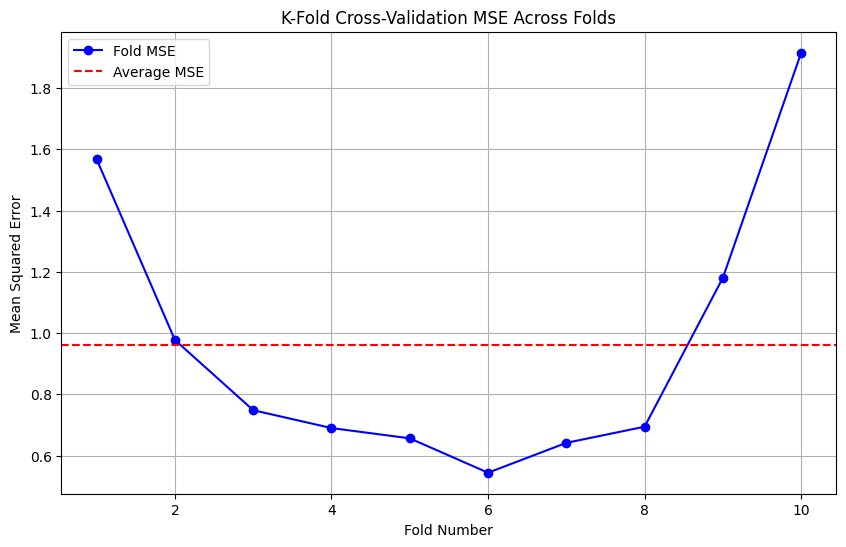

Average LOOCV MSE: 0.9525

Summary of Results:
10-Fold Cross-Validation MSE: 0.9616
LOOCV MSE: 0.9525


In [1]:
# I started by importing the necessary libraries for this task.
# These tools would allow me to generate synthetic data, perform K-Fold Cross-Validation,
# and evaluate model performance.
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Generating Synthetic Data
# I decided to create synthetic data to simulate a realistic bioinformatics scenario.
# This dataset mimics gene expression levels (predictors) and a continuous response variable.
np.random.seed(123)  # I set a seed to ensure reproducibility.
n_samples = 100  # I chose 100 samples to represent a small dataset, typical in bioinformatics.
n_features = 10  # I included 10 predictors to simulate a high-dimensional feature space.

# I generated predictors (X) from a standard normal distribution.
X = np.random.normal(size=(n_samples, n_features))

# I created the true coefficients to represent the underlying biological relationship.
true_coefficients = np.random.uniform(-2, 2, size=n_features)

# I calculated the response variable (Y) by applying a linear relationship and adding noise.
# The noise represents the inherent variability in biological systems.
Y = np.dot(X, true_coefficients) + np.random.normal(scale=1.0, size=n_samples)

# Step 2: Setting Up K-Fold Cross-Validation
# I decided to use 10-fold cross-validation because it provides a good balance between bias and variance.
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=123)

# I initialized a list to store the Mean Squared Error (MSE) for each fold.
cv_mse_scores = []

# Step 3: Performing K-Fold Cross-Validation
# I looped through each split of the data, using one fold for validation and the rest for training.
for train_index, val_index in kf.split(X):
    # For each fold, I split the data into training and validation sets.
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]

    # I trained a linear regression model on the training set.
    model = LinearRegression()
    model.fit(X_train, Y_train)

    # I made predictions on the validation set.
    Y_val_pred = model.predict(X_val)

    # I calculated the MSE for this fold and stored it in my list.
    fold_mse = mean_squared_error(Y_val, Y_val_pred)
    cv_mse_scores.append(fold_mse)

# Step 4: Calculating the Average Cross-Validation MSE
# I calculated the average MSE across all folds to get a single measure of model performance.
avg_cv_mse = np.mean(cv_mse_scores)
print(f"Average Cross-Validation MSE: {avg_cv_mse:.4f}")

# Step 5: Visualizing Cross-Validation Results
# I wanted to see how the MSE varied across the folds, so I plotted the results.
plt.figure(figsize=(10, 6))
plt.plot(range(1, k + 1), cv_mse_scores, marker='o', linestyle='-', color='blue', label="Fold MSE")
plt.axhline(y=avg_cv_mse, color='red', linestyle='--', label="Average MSE")
plt.xlabel("Fold Number")
plt.ylabel("Mean Squared Error")
plt.title("K-Fold Cross-Validation MSE Across Folds")
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Leave-One-Out Cross-Validation (LOOCV)
# I decided to implement LOOCV to compare it with 10-fold cross-validation.
# LOOCV is computationally expensive because it trains the model N times, where N is the number of samples.
loocv = KFold(n_splits=n_samples, shuffle=True, random_state=123)
loocv_mse_scores = []

# I looped through each split, where each observation became its own validation set.
for train_index, val_index in loocv.split(X):
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]

    # I trained the model on the training set.
    model.fit(X_train, Y_train)

    # I made a prediction for the single validation sample.
    Y_val_pred = model.predict(X_val)

    # I calculated the MSE for this observation and stored it.
    fold_mse = mean_squared_error(Y_val, Y_val_pred)
    loocv_mse_scores.append(fold_mse)

# I calculated the average LOOCV MSE.
avg_loocv_mse = np.mean(loocv_mse_scores)
print(f"Average LOOCV MSE: {avg_loocv_mse:.4f}")

# Step 7: Comparing 10-Fold Cross-Validation and LOOCV
# I summarized the results to understand the trade-offs between the two methods.
print("\nSummary of Results:")
print(f"10-Fold Cross-Validation MSE: {avg_cv_mse:.4f}")
print(f"LOOCV MSE: {avg_loocv_mse:.4f}")

# I noted that while LOOCV used all but one observation for training, it had higher variance due to the small validation sets.
# In contrast, 10-fold cross-validation provided a more stable estimate of test error by using larger training sets and reducing variability.

# Final Thoughts:
# By using 10-fold cross-validation, I made efficient use of the data and achieved a reliable estimate of model performance.
# LOOCV, while informative, was computationally expensive and less practical for larger datasets.
